# EXPLORATION 2 : Iris의 세 가지 품종, 분류해볼 수 있겠어요?

## 준비한 데이터
- scikit-learn에 내장되어 있는 예제 데이터셋
- scikit-learn에 내장되어 있는 분류 모델들

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

iris.keys()
# iris에는 어떤 정보들이 담겼을지, keys() 라는 메서드로 확인

iris_data = iris.data

print(iris_data.shape) 
# shape는 배열의 형상정보를 출력

iris_data[0]

iris_label = iris.target
print(iris_label.shape)
iris_label
# 붓꽃 데이터에서 타겟 정보확인

iris.target_names
# 라벨이름 확인

iris.feature_names
# feature_names에는 다음과 같이 4개의 각 feature에 대한 설명

iris.filename
# filename에는 데이터셋 파일이 저장된 경로를 보여줌

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df
# 붓꽃 데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환

iris_df["label"] = iris.target
iris_df
# label이라는 컬럼을 추가

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
# sklearn.model_selection 패키지의 train_test_split을 활용하여, 다음과 같이 trainig dataset과 test dataset을 간단히 분리

In [ ]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape
y_train, y_test
# X_train부터 y_test까지 만들어진 데이터셋 확인

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델을 import해서 가져오고, decision_tree 라는 변수에 모델을 저장
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

In [ ]:
decision_tree.fit(X_train, y_train)
# 모델 학습

In [ ]:
y_pred = decision_tree.predict(X_test)
y_pred
# 테스트 데이터로 예측
y_test
# 얼마나 맞았는지 확인

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy
# 정확도 확인

# 위 과정을 한번에 요약

In [ ]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# decisiontree를 RandomForest로 변경

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

# SVM 모델을 학습시키고, 결과를 확인

In [ ]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

# SGD Classifier 모델을 학습시키고, 결과를 확인

In [ ]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Logistic Regression 모델을 학습시고, 결과를 확인

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

# ----------------------------------------------------------------------------------------------------------

# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

In [1]:
# 필요한 모듈 import하기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 준비
digits = load_digits()
digits_data = digits.data      # Feature Data 지정하기
digits_label = digits.target   # Label Data 지정하기

# 데이터 이해하기
print(digits.keys())
print(digits_data.shape)
print(digits_label.shape)
print("--------------------")
print(digits.target_names)   # Target Names 출력해 보기
print(digits.DESCR)          # 데이터 Describe 해 보기

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)
--------------------
[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the train

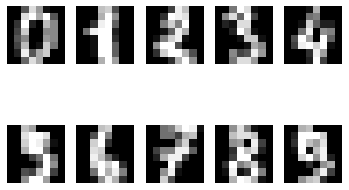

In [2]:
# 여러개의 이미지 확인
for i in range(10):      
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=15)

# 다양한 모델로 학습시켜보기

In [3]:
from sklearn.tree import DecisionTreeClassifier             # 1번
from sklearn.ensemble import RandomForestClassifier         # 2번
from sklearn import svm                                     # 3번
from sklearn.linear_model import SGDClassifier              # 4번
from sklearn.linear_model import LogisticRegression         # 5번

In [4]:
# 1번 모델
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



In [5]:
# 2번 모델
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.95      0.97      0.96        38
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        27
           4       0.95      1.00      0.98        41
           5       0.97      1.00      0.99        35
           6       1.00      0.95      0.97        38
           7       1.00      1.00      1.00        34
           8       0.94      0.97      0.96        35
           9       1.00      0.98      0.99        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [6]:
# 3번 모델
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [7]:
# 4번 모델
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.95      0.94        38
           2       1.00      0.97      0.99        38
           3       0.93      0.93      0.93        27
           4       1.00      0.98      0.99        41
           5       0.95      1.00      0.97        35
           6       1.00      1.00      1.00        38
           7       0.89      1.00      0.94        34
           8       0.94      0.89      0.91        35
           9       0.95      0.88      0.92        43

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [8]:
# 5번 모델
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.93      1.00      0.96        41
           5       0.94      0.97      0.96        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.94      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 준비
digits = load_wine()
digits_data = digits.data      # Feature Data 지정하기
digits_label = digits.target   # Label Data 지정하기

# 데이터 이해하기
print(digits.keys())
print(digits_data.shape)
print(digits_label.shape)
print("--------------------")
print(digits.target_names)   # Target Names 출력해 보기
print(digits.DESCR)          # 데이터 Describe 해 보기

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
(178, 13)
(178,)
--------------------
['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
  

# train, test 데이터 분리

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=15)

# 다양한 모델로 학습시켜보기

In [11]:
from sklearn.tree import DecisionTreeClassifier             # 1번
from sklearn.ensemble import RandomForestClassifier         # 2번
from sklearn import svm                                     # 3번
from sklearn.linear_model import SGDClassifier              # 4번
from sklearn.linear_model import LogisticRegression         # 5번

In [12]:
# 1번 모델
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.83      0.87        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [13]:
# 2번 모델
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [14]:
# 3번 모델
svm_model = svm.SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



In [15]:
# 4번 모델
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.88      0.58      0.70        12
           2       0.69      0.75      0.72        12

    accuracy                           0.75        36
   macro avg       0.77      0.75      0.74        36
weighted avg       0.77      0.75      0.74        36



In [16]:
# 5번 모델
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 준비
digits = load_breast_cancer()
digits_data = digits.data      # Feature Data 지정하기
digits_label = digits.target   # Label Data 지정하기

# 데이터 이해하기
print(digits.keys())
print(digits_data.shape)
print(digits_label.shape)
print("--------------------")
print(digits.target_names)   # Target Names 출력해 보기
print(digits.DESCR)          # 데이터 Describe 해 보기

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
(569,)
--------------------
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the

# train, test 데이터 분리

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=15)

# 다양한 모델로 학습시켜보기

In [19]:
from sklearn.tree import DecisionTreeClassifier             # 1번
from sklearn.ensemble import RandomForestClassifier         # 2번
from sklearn import svm                                     # 3번
from sklearn.linear_model import SGDClassifier              # 4번
from sklearn.linear_model import LogisticRegression         # 5번

In [20]:
# 1번 모델
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [21]:
# 2번 모델
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [22]:
# 3번 모델
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



In [23]:
# 4번 모델
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        39
           1       0.83      0.96      0.89        75

    accuracy                           0.84       114
   macro avg       0.86      0.79      0.81       114
weighted avg       0.85      0.84      0.83       114



In [24]:
# 5번 모델
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# 모델 평가하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.91      0.93      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



# 결과
- 프로젝트 1의 경우는 accuracy값 기준으로 2번(RandomForest)과 3번(svm) 모델이 가장 효과적이었다.

- 프로젝트 2의 경우는 2번(RandomForest) 모델이 accuracy값이 1로 완벽하게 분류했기 때문에 가장 효과적이었다.

- 프로젝트 3의 경우는 0 타겟을 대상으로 한 Recall 값 기준으로 1번(DecisionTree), 2번(RandomForest) 모델이 가장 효과적이었다.

- 최종결과 : 공통적으로 가장 잘 분류한 RandomForest가 가장 유용한 모델이다.

# sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택하고 이유 말하기
- classification_report를 선택했는데 이유는 precision 값과 recall 값과 f1-score 값을 알려주기 때문이다. 이번 노드에서 accuracy로만 데이터를 판단하는건 좋지 않다고 했기 때문에 위 3개 지표값을 포함한 데이터를 보는게 좋을 것이라고 판단했다.